<a href="https://colab.research.google.com/github/mkmahto2/Goeduhub_DL_ML_2021/blob/master/Student_Hours_Scores_using_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **Assignment 7**

Name: <b><a href="https://github.com/mkmahto2">Mukesh Kumar Mahto</a></b>





Reg_ID: GO_STP_9639



**Prediction using Supervised Machine Learning using Simple Linear Regression**

In this task we have to find the students scores based on their study hours. This is a simple Regression problem type because it has only two variables. 

Sample Dataset- you can download a csv file of dataset <a href="https://drive.google.com/file/d/1vFumlk_XZAGKDtUOByWn_Ph-U797tVkO/view">this link.</a>

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
# mount google_drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
##read the dataset from google drive /Godeuhub/StudentHoursScore.csv
dataset=pd.read_csv("/content/drive/MyDrive/Goeduhub/StudentHoursScores.csv")

In [ ]:
print(dataset)

    Hours  Scores
0     7.7      79
1     5.9      60
2     4.5      45
3     3.3      33
4     1.1      12
5     8.9      87
6     2.5      21
7     1.9      19
8     2.7      29
9     8.3      81
10    5.5      58
11    9.2      88
12    1.5      14
13    3.5      34
14    8.5      85
15    3.2      32
16    6.5      66
17    2.5      21
18    9.6      96
19    4.3      42
20    4.1      40
21    3.0      30
22    2.6      25


In [ ]:
dataset.head()

,Hours,Scores
0,7.7,79
1,5.9,60
2,4.5,45
3,3.3,33
4,1.1,12


In [9]:
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


In [10]:
dataset.tail(5)

,Hours,Scores
18,9.6,96
19,4.3,42
20,4.1,40
21,3.0,30
22,2.6,25


In [11]:
dataset.columns

Index(['Hours', 'Scores'], dtype='object')

In [12]:
dataset.shape

(23, 2)

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   23 non-null     float64
 1   Scores  23 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 496.0 bytes


In [14]:
dataset.min()

Hours      1.1
Scores    12.0
dtype: float64

In [15]:
dataset.max()

Hours      9.6
Scores    96.0
dtype: float64

In [16]:
dataset.describe()

,Hours,Scores
count,23.000000,23.000000
mean,4.817391,47.695652
std,2.709688,27.103228
min,1.100000,12.000000
25%,2.650000,27.000000
50%,4.100000,40.000000
75%,7.100000,72.500000
max,9.600000,96.000000


In [17]:
## to see 2nd to before 6th row
dataset.iloc[2:6]

,Hours,Scores
2,4.5,45
3,3.3,33
4,1.1,12
5,8.9,87


In [18]:
dataset.corr()

,Hours,Scores
Hours,1.000000,0.997656
Scores,0.997656,1.000000


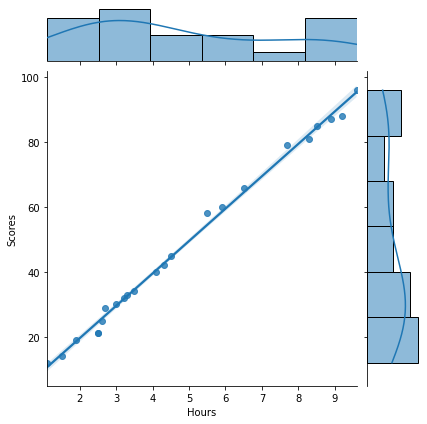

In [ ]:
import seaborn as sns
sns.jointplot(data=dataset, x='Hours', y = 'Scores', kind='reg')

In [ ]:
dataset.nunique()

Hours     22
Scores    22
dtype: int64

Visualization using scatter plot

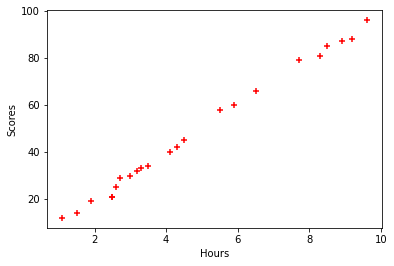

In [ ]:
x=dataset['Hours']
y=dataset['Scores']
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.scatter(x,y,color='red',marker='+')
plt.show()

Spliting of dataset in test and training

In [20]:
##iloc is accesing all the elemnts,dont know column name, by index
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
print(x)## features can be multidimesional
print(y)## but output must be one D array



[[7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [2.7]
 [8.3]
 [5.5]
 [9.2]
 [1.5]
 [3.5]
 [8.5]
 [3.2]
 [6.5]
 [2.5]
 [9.6]
 [4.3]
 [4.1]
 [3. ]
 [2.6]]
[79 60 45 33 12 87 21 19 29 81 58 88 14 34 85 32 66 21 96 42 40 30 25]


In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2)

In [22]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()##y=a+bx
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
x_train.shape

(18, 1)

Predictions

In [24]:
y_predict=model.predict(x_test)

In [25]:
#difference between y_test and y_predict
y_predict

array([40.87711348, 25.025345  , 32.95122924, 34.9327003 , 42.85858454])

In [26]:
y_test

array([40, 21, 33, 34, 42])

In [27]:
model.predict([[9]])

array([89.42315447])

In [28]:
model.coef_

array([9.9073553])

In [29]:
model.intercept_

0.2569567372371395

In [30]:
##y=mx+c x=9,m=9332.94473799(intercept) , c=25609.89799835482(coef)
9.9073553*9+0.2569567372371395

89.42315443723714

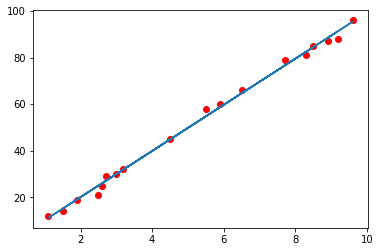

In [31]:
plt.scatter(x_train,y_train,color="red")
plt.plot(x_train,model.predict(x_train))
plt.show()